# `Used Car Price Prediction`

## `1. Installing and Importing Libraries`

In [1]:
!pip install scikit-learn pandas matplotlib seaborn


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

## `2. About Dataset`

In [3]:
df = pd.read_csv('data/train-data.csv')

df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.shape

(6019, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


In [8]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [9]:
df.shape

(6019, 13)

## `3. Feature Engineering and Exploratory Data Analysis`

### `3.1 Feature Engineering`

In [10]:
df['Kilometers_Driven'].value_counts()

60000    82
45000    70
65000    68
50000    61
55000    60
         ..
28937     1
82085     1
68465     1
63854     1
27365     1
Name: Kilometers_Driven, Length: 3093, dtype: int64

In [11]:
# Looking ate the unique values of Categorical Features
print(df['Location'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner_Type'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [12]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [13]:
print("Shape of training data Before dropping any Row: ",df.shape)
df = df[df['Mileage'].notna()]
print("Shape of training data After dropping Rows with NULL values in Mileage: ",df.shape)
df = df[df['Engine'].notna()]
print("Shape of training data After dropping Rows with NULL values in Engine : ",df.shape)
df = df[df['Power'].notna()]
print("Shape of training data After dropping Rows with NULL values in Power  : ",df.shape)
df = df[df['Seats'].notna()]
print("Shape of training data After dropping Rows with NULL values in Seats  : ",df.shape)

Shape of training data Before dropping any Row:  (6019, 13)
Shape of training data After dropping Rows with NULL values in Mileage:  (6017, 13)
Shape of training data After dropping Rows with NULL values in Engine :  (5981, 13)
Shape of training data After dropping Rows with NULL values in Power  :  (5981, 13)
Shape of training data After dropping Rows with NULL values in Seats  :  (5975, 13)


In [14]:
df.shape

(5975, 13)

In [15]:
df = df.reset_index(drop=True)

In [16]:
df.sample(4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1401,Maruti Swift Dzire Tour LDI,Kolkata,2017,148000,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,NaN,4.75
1047,Mercedes-Benz New C-Class C 220 CDI Avantgarde,Mumbai,2010,49000,Diesel,Automatic,First,19.27 kmpl,2143 CC,170 bhp,5.0,NaN,8.95
1590,Volkswagen Polo 1.5 TDI Comfortline,Kolkata,2016,29000,Diesel,Manual,First,20.14 kmpl,1498 CC,88.8 bhp,5.0,NaN,4.00
1668,Hyundai Grand i10 1.2 Kappa Magna,Delhi,2017,12248,Petrol,Manual,First,18.9 kmpl,1197 CC,81.86 bhp,5.0,6.54 Lakh,4.90


In [17]:
for i in range(df.shape[0]):
    df.at[i, 'Company'] = df['Name'][i].split()[0]
    df.at[i, 'Mileage_km_per_kg'] = df['Mileage'][i].split()[0]
    df.at[i, 'Engine_cc'] = df['Engine'][i].split()[0]
    df.at[i, 'Power_bhp'] = df['Power'][i].split()[0]

In [18]:
df['Mileage_km_per_kg'] = df['Mileage_km_per_kg'].astype(float)
df['Engine_cc'] = df['Engine_cc'].astype(float)

In [19]:
df.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage_km_per_kg,Engine_cc,Power_bhp
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.2


In [20]:
x = 'n'
count = 0
position = []
for i in range(df.shape[0]):
    if df['Power_bhp'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)
print(x)
print(count)
print(position)

Y
103
[76, 79, 89, 120, 143, 225, 242, 259, 304, 305, 383, 421, 425, 440, 469, 572, 628, 644, 645, 735, 744, 824, 910, 921, 929, 1063, 1138, 1148, 1266, 1313, 1338, 1380, 1411, 1546, 1569, 1640, 1663, 1848, 1989, 2043, 2118, 2152, 2250, 2254, 2292, 2328, 2377, 2425, 2434, 2481, 2485, 2511, 2561, 2579, 2616, 2621, 2868, 3010, 3038, 3081, 3166, 3224, 3266, 3414, 3491, 3506, 3562, 3601, 3611, 3618, 3642, 3706, 3868, 3900, 3969, 4046, 4049, 4318, 4321, 4593, 4672, 4676, 4706, 4792, 4848, 4862, 4914, 5024, 5078, 5186, 5383, 5395, 5415, 5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941]


In [21]:
df = df.drop(df.index[position])
df = df.reset_index(drop=True)

In [22]:
df.shape

(5872, 17)

In [23]:
df['Power_bhp'] = df['Power_bhp'].astype(float)

In [24]:
df.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage_km_per_kg,Engine_cc,Power_bhp
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.20


In [25]:
for i in range(df.shape[0]):
    if pd.isnull(df.loc[i,'New_Price']) == False:
        df.at[i,'New_car_Price'] = df['New_Price'][i].split()[0]

In [26]:
df['New_car_Price'] = df['New_car_Price'].astype(float)

In [27]:
df.drop(["Name"],axis=1,inplace=True)
df.drop(["Mileage"],axis=1,inplace=True)
df.drop(["Engine"],axis=1,inplace=True)
df.drop(["Power"],axis=1,inplace=True)
df.drop(["New_Price"],axis=1,inplace=True)

In [28]:
df.shape

(5872, 13)

In [29]:
df.head(2)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage_km_per_kg,Engine_cc,Power_bhp,New_car_Price
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN


In [30]:
df[df['New_car_Price']=='NaN'].value_counts()

Series([], dtype: int64)

### `3.2 Exploratory Data Analysis`

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Seats              5872 non-null   float64
 7   Price              5872 non-null   float64
 8   Company            5872 non-null   object 
 9   Mileage_km_per_kg  5872 non-null   float64
 10  Engine_cc          5872 non-null   float64
 11  Power_bhp          5872 non-null   float64
 12  New_car_Price      823 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 596.5+ KB


 Now we have NaN values only in New_car_Price column and that too is very high

### `Price`

In [32]:
df['Price'].describe()

count    5872.000000
mean        9.603919
std        11.249453
min         0.440000
25%         3.517500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

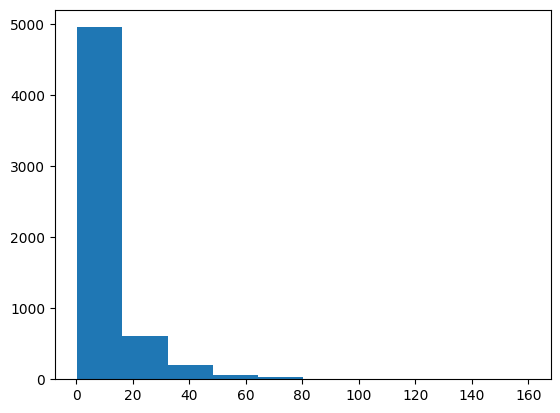

In [33]:
plt.hist(df['Price'])
plt.show()

As we can see that 75% quartile of `Price` column is just 10 whereas max one is 160, so we can consider such points as outliers and this can degrade the accuracy of the model hence lets remove these types of rows.

In [34]:
df[df['Price']>=80]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage_km_per_kg,Engine_cc,Power_bhp,New_car_Price
1463,Kochi,2019,26013,Diesel,Automatic,First,5.0,97.07,Land,12.65,2993.0,255.00,1.39
1926,Coimbatore,2018,28060,Petrol,Automatic,First,5.0,93.67,BMW,12.05,2979.0,320.00,NaN
1936,Bangalore,2017,17465,Petrol,Automatic,First,5.0,93.00,BMW,12.05,2979.0,320.00,NaN
2044,Coimbatore,2019,2526,Petrol,Automatic,First,2.0,83.96,Mercedes-Benz,19.00,2996.0,362.07,1.06
3972,Hyderabad,2017,25000,Diesel,Automatic,First,5.0,160.00,Land,13.33,2993.0,255.00,2.30
4575,Bangalore,2014,3000,Petrol,Automatic,Second,2.0,90.00,Mercedes-Benz,12.00,5461.0,421.00,NaN
5397,Ahmedabad,2015,97003,Diesel,Automatic,First,5.0,85.00,BMW,15.87,2993.0,308.43,NaN
5640,Delhi,2011,6500,Petrol,Automatic,Third,2.0,120.00,Lamborghini,6.40,5204.0,560.00,NaN
5775,Hyderabad,2015,8000,Petrol,Automatic,First,2.0,100.00,Jaguar,12.50,5000.0,488.10,NaN


In [35]:
df = df[df['Price']<80]

### `Location`

In [36]:
df['Location'].value_counts()

Mumbai        775
Hyderabad     716
Kochi         644
Coimbatore    627
Pune          594
Delhi         544
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     345
Ahmedabad     219
Name: Location, dtype: int64

In [37]:
h = []

for i in range(len(df['Location'].value_counts())):
    h.append(df['Location'].value_counts()[i])
    
print(h)

[775, 716, 644, 627, 594, 544, 521, 476, 402, 345, 219]


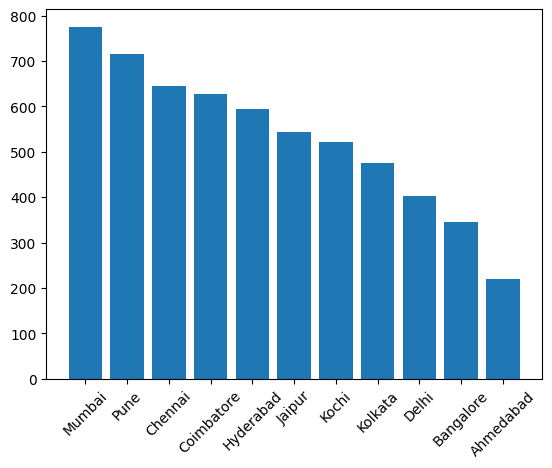

In [38]:
plt.bar(df['Location'].unique(),height=h)
plt.xticks(rotation=45)
plt.show()

In [39]:
X = df.drop(['Price'],axis=1)
y = df['Price']

In [40]:
X.shape

(5863, 12)

In [41]:
y.shape

(5863,)

In [42]:
X.head(2)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Company,Mileage_km_per_kg,Engine_cc,Power_bhp,New_car_Price
0,Mumbai,2010,72000,CNG,Manual,First,5.0,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,First,5.0,Hyundai,19.67,1582.0,126.20,NaN


In [43]:
y.head(2)

0     1.75
1    12.50
Name: Price, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
X_train.shape,X_test.shape

((4690, 12), (1173, 12))

In [46]:
y_train.shape,y_test.shape

((4690,), (1173,))

In [47]:
X_train.drop(['New_car_Price'],axis=1,inplace=True)
X_test.drop(['New_car_Price'],axis=1,inplace=True)

## `Creating the Pipeline`

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_absolute_error

## `Importing Regression Models`

In [49]:
!pip install xgboost


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

**Let's try different different Regression Models now ..**

### `1. Linear Regression`

In [51]:
step1 = ColumnTransformer(transformers=[
    ('scal_tnf',MinMaxScaler(),[1,2,6,8,9,10]),
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,3,4,5,7])
],remainder='passthrough')

step2 = LinearRegression()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred))

R2 score 0.7899095998412429
Mean Absolute error 2.8582501057264365


F:\Machine Learning\Projects\Used Car Price Prediction\usedcar\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### `2. Decision Tree Regressor`

In [52]:
step1 = ColumnTransformer(transformers=[
    ('scal_tnf',MinMaxScaler(),[1,2,6,8,9,10]),
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,3,4,5,7])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=9)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred))

R2 score 0.8475788118073202
Mean Absolute error 1.9613518909571825


F:\Machine Learning\Projects\Used Car Price Prediction\usedcar\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### `3. Random Forest Regressor`

In [53]:
step1 = ColumnTransformer(transformers=[
    ('scal_tnf',MinMaxScaler(),[1,2,6,8,9,10]),
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,3,4,5,7])
],remainder='passthrough')

step2 = RandomForestRegressor(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=90,
                               max_features=10,
                               max_depth=40, 
                               max_leaf_nodes=2**20)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred))

R2 score 0.9238697475048675
Mean Absolute error 1.4220805430384718


F:\Machine Learning\Projects\Used Car Price Prediction\usedcar\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### `4. Extra Tree Regressor`

In [54]:
step1 = ColumnTransformer(transformers=[
    ('scal_tnf',MinMaxScaler(),[1,2,6,8,9,10]),
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,3,4,5,7])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=10,
                            random_state=3,
                            max_samples=None,
                            max_features=0.75,
                            max_depth=15)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred))

F:\Machine Learning\Projects\Used Car Price Prediction\usedcar\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


R2 score 0.9214550223043072
Mean Absolute error 1.4447143847228745


### `5. Gradient Boosting Regressor`

In [55]:
step1 = ColumnTransformer(transformers=[
    ('scal_tnf',MinMaxScaler(),[1,2,6,8,9,10]),
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,3,4,5,7])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=100)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred))

R2 score 0.9098190095463089
Mean Absolute error 1.6916919546288207


F:\Machine Learning\Projects\Used Car Price Prediction\usedcar\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### `6. XgBoost Regressor`

In [56]:
step1 = ColumnTransformer(transformers=[
    ('scal_tnf',MinMaxScaler(),[1,2,6,8,9,10]),
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,3,4,5,7])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=200,max_depth=5,learning_rate=0.5)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred))

R2 score 0.9396061787919345
Mean Absolute error 1.3069926398442477


F:\Machine Learning\Projects\Used Car Price Prediction\usedcar\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


So XgBoost Regressor is giving best Result in this case with a loss of 1.306 and Accuracy of 93.96%

## Final Saving the Model

In [57]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage_km_per_kg,Engine_cc,Power_bhp,New_car_Price
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.80,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Delhi,2014,27365,Diesel,Manual,First,5.0,4.75,Maruti,28.40,1248.0,74.00,7.88
5868,Jaipur,2015,100000,Diesel,Manual,First,5.0,4.00,Hyundai,24.40,1120.0,71.00,NaN
5869,Jaipur,2012,55000,Diesel,Manual,Second,8.0,2.90,Mahindra,14.00,2498.0,112.00,NaN
5870,Kolkata,2013,46000,Petrol,Manual,First,5.0,2.65,Maruti,18.90,998.0,67.10,NaN


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5863 entries, 0 to 5871
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5863 non-null   object 
 1   Year               5863 non-null   int64  
 2   Kilometers_Driven  5863 non-null   int64  
 3   Fuel_Type          5863 non-null   object 
 4   Transmission       5863 non-null   object 
 5   Owner_Type         5863 non-null   object 
 6   Seats              5863 non-null   float64
 7   Price              5863 non-null   float64
 8   Company            5863 non-null   object 
 9   Mileage_km_per_kg  5863 non-null   float64
 10  Engine_cc          5863 non-null   float64
 11  Power_bhp          5863 non-null   float64
 12  New_car_Price      820 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 641.3+ KB


In [59]:
df.drop(['New_car_Price'],axis=1,inplace=True)

In [60]:
df.head(2)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage_km_per_kg,Engine_cc,Power_bhp
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20


In [61]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [62]:
df.Kilometers_Driven.unique()

array([72000, 41000, 46000, ..., 45004, 70602, 27365], dtype=int64)